In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data

In [5]:
# load the dataset
crop = pd.read_csv("/content/Crop_recommendation.csv")

In [6]:
# Display first 5 rows and count total rows
print("First 5 rows of the dataset:")
print(crop.head())
print(f"\nTotal number of rows: {len(crop)}")  # Added to show total rows

First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Total number of rows: 2200


In [8]:
# Check the shape of the dataset
print("\nShape of the dataset:", crop.shape)


Shape of the dataset: (2200, 8)


In [9]:
# Check the basic information of the dataset
print("\nDataset Info:")
crop.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# Check the missing values in the dataset
print("\nMissing Values:")
print(crop.isnull().sum())


Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [11]:
# Check the duplicated values in the dataset
print("\nDuplicated Values:")
print(crop.duplicated().sum())


Duplicated Values:
0


In [12]:
# Check the basic statistics and round the values for readability
print("\nBasic Statistics (rounded):")
print(crop.describe().round(2))  # Rounded stats to 2 decimals


Basic Statistics (rounded):
             N        P        K  temperature  humidity       ph  rainfall
count  2200.00  2200.00  2200.00      2200.00   2200.00  2200.00   2200.00
mean     50.55    53.36    48.15        25.62     71.48     6.47    103.46
std      36.92    32.99    50.65         5.06     22.26     0.77     54.96
min       0.00     5.00     5.00         8.83     14.26     3.50     20.21
25%      21.00    28.00    20.00        22.77     60.26     5.97     64.55
50%      37.00    51.00    32.00        25.60     80.47     6.43     94.87
75%      84.25    68.00    49.00        28.56     89.95     6.92    124.27
max     140.00   145.00   205.00        43.68     99.98     9.94    298.56


In [13]:
# Exploring Data
# Check the target distribution and sort it
print("\nTarget Distribution (sorted):")
print(crop['label'].value_counts().sort_index())  # Sorted by crop name


Target Distribution (sorted):
label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: count, dtype: int64


In [14]:
# Get the features list
features = crop.columns.to_list()
features.remove('label')
print("\nFeatures in the dataset:", features)


Features in the dataset: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


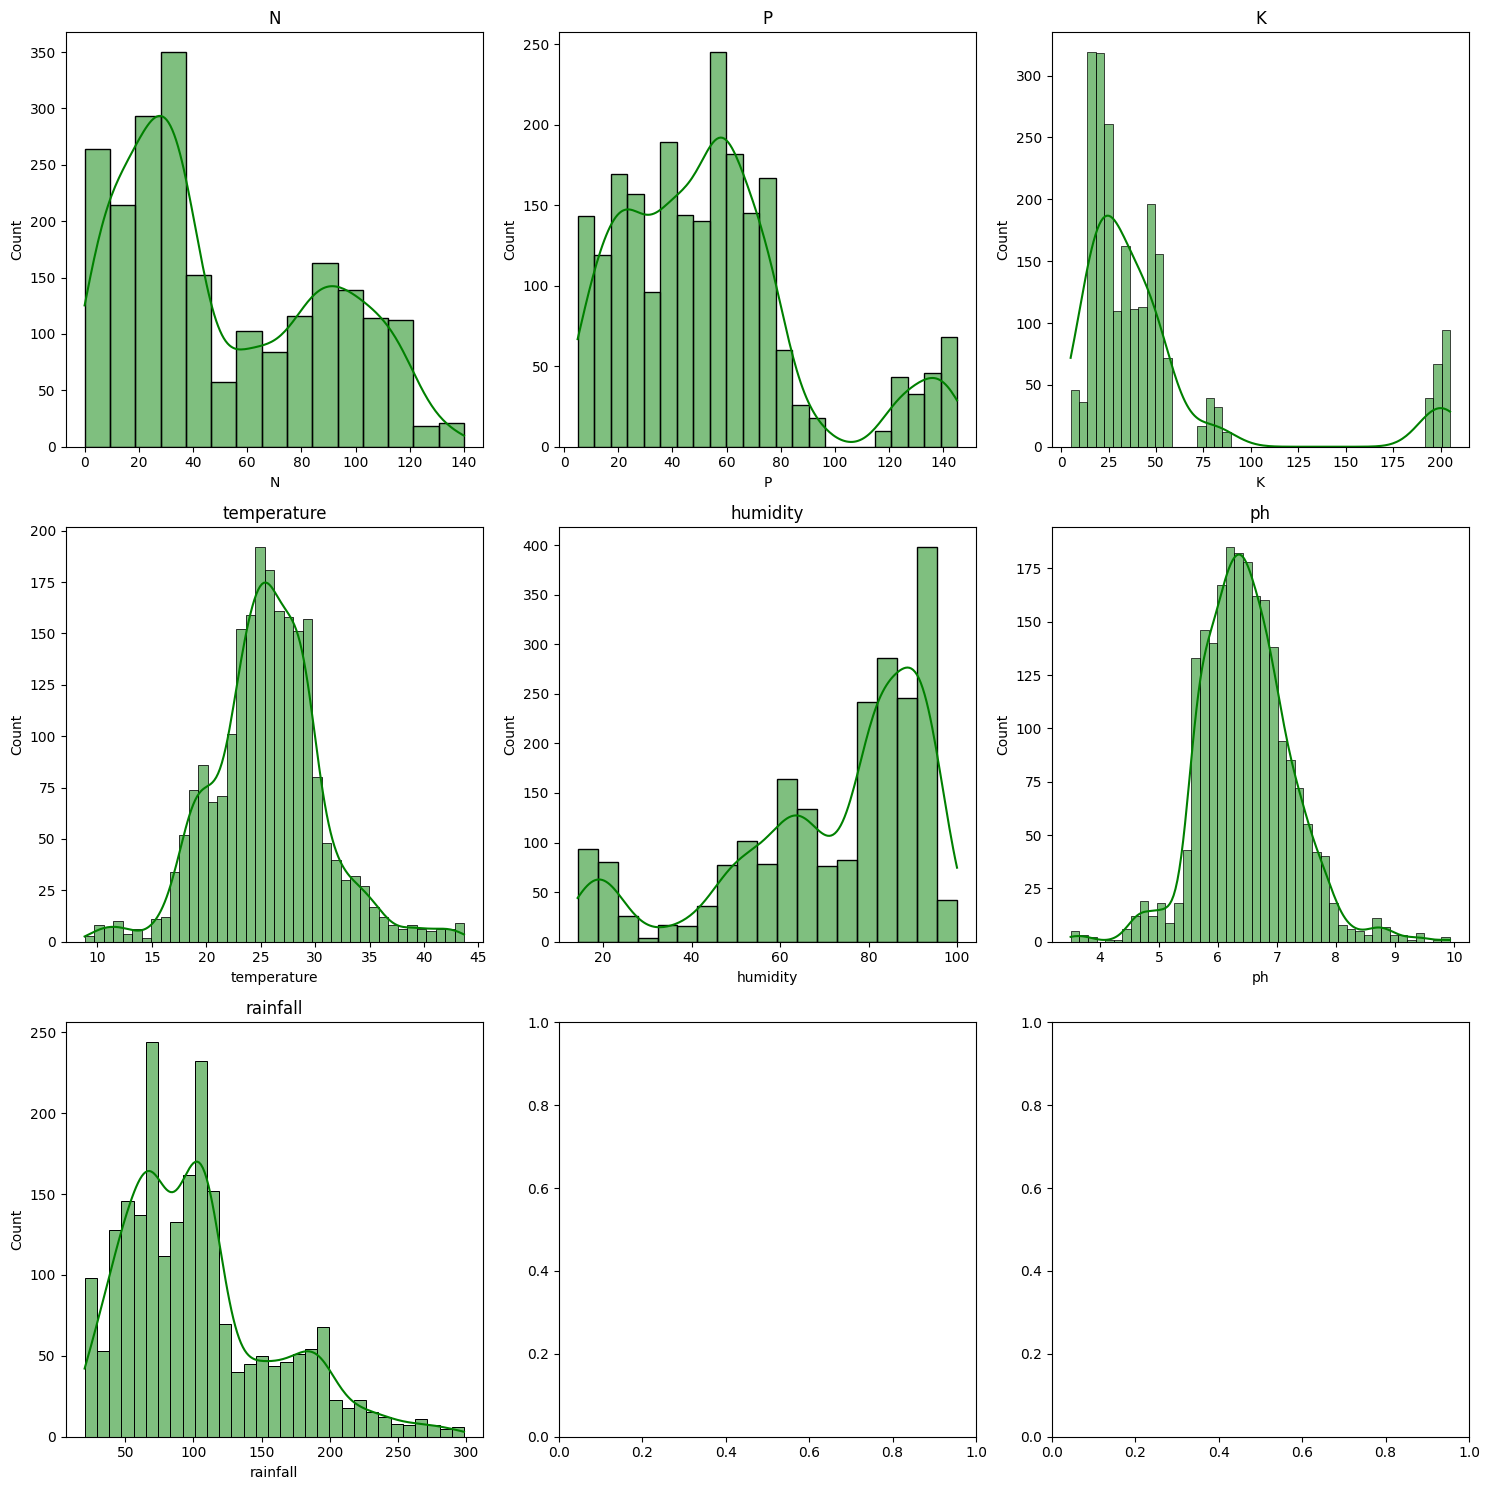

In [15]:
# Visualize the distribution of each feature with a different color
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True, color='green')  # Changed color to green
    subplot.set_title(i)
plt.tight_layout()
plt.savefig('feature_distribution.png')

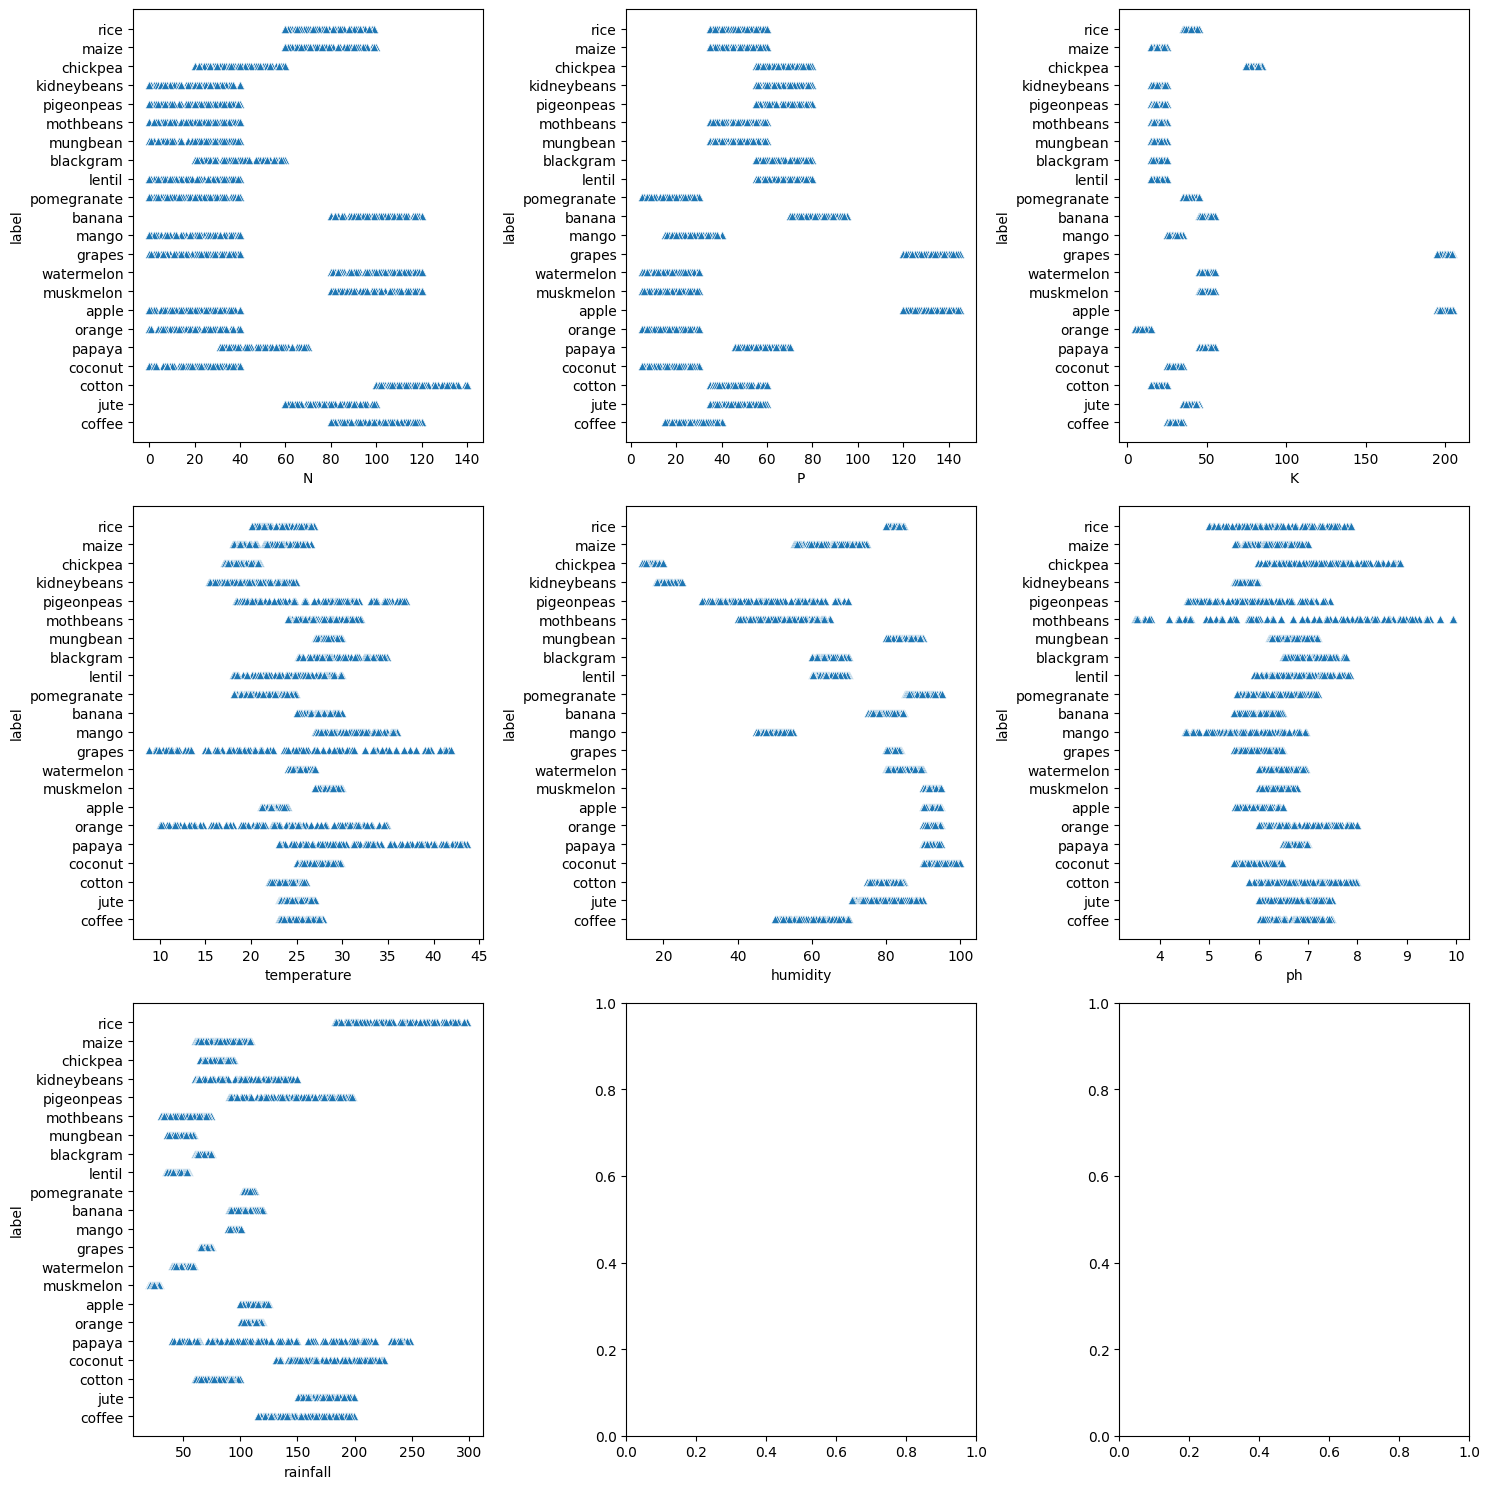

In [16]:
# Plot scatter plot of each feature against the target with a marker change
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot, marker='^')  # Changed marker to triangle
plt.tight_layout()
plt.savefig('scatter_plots.png')

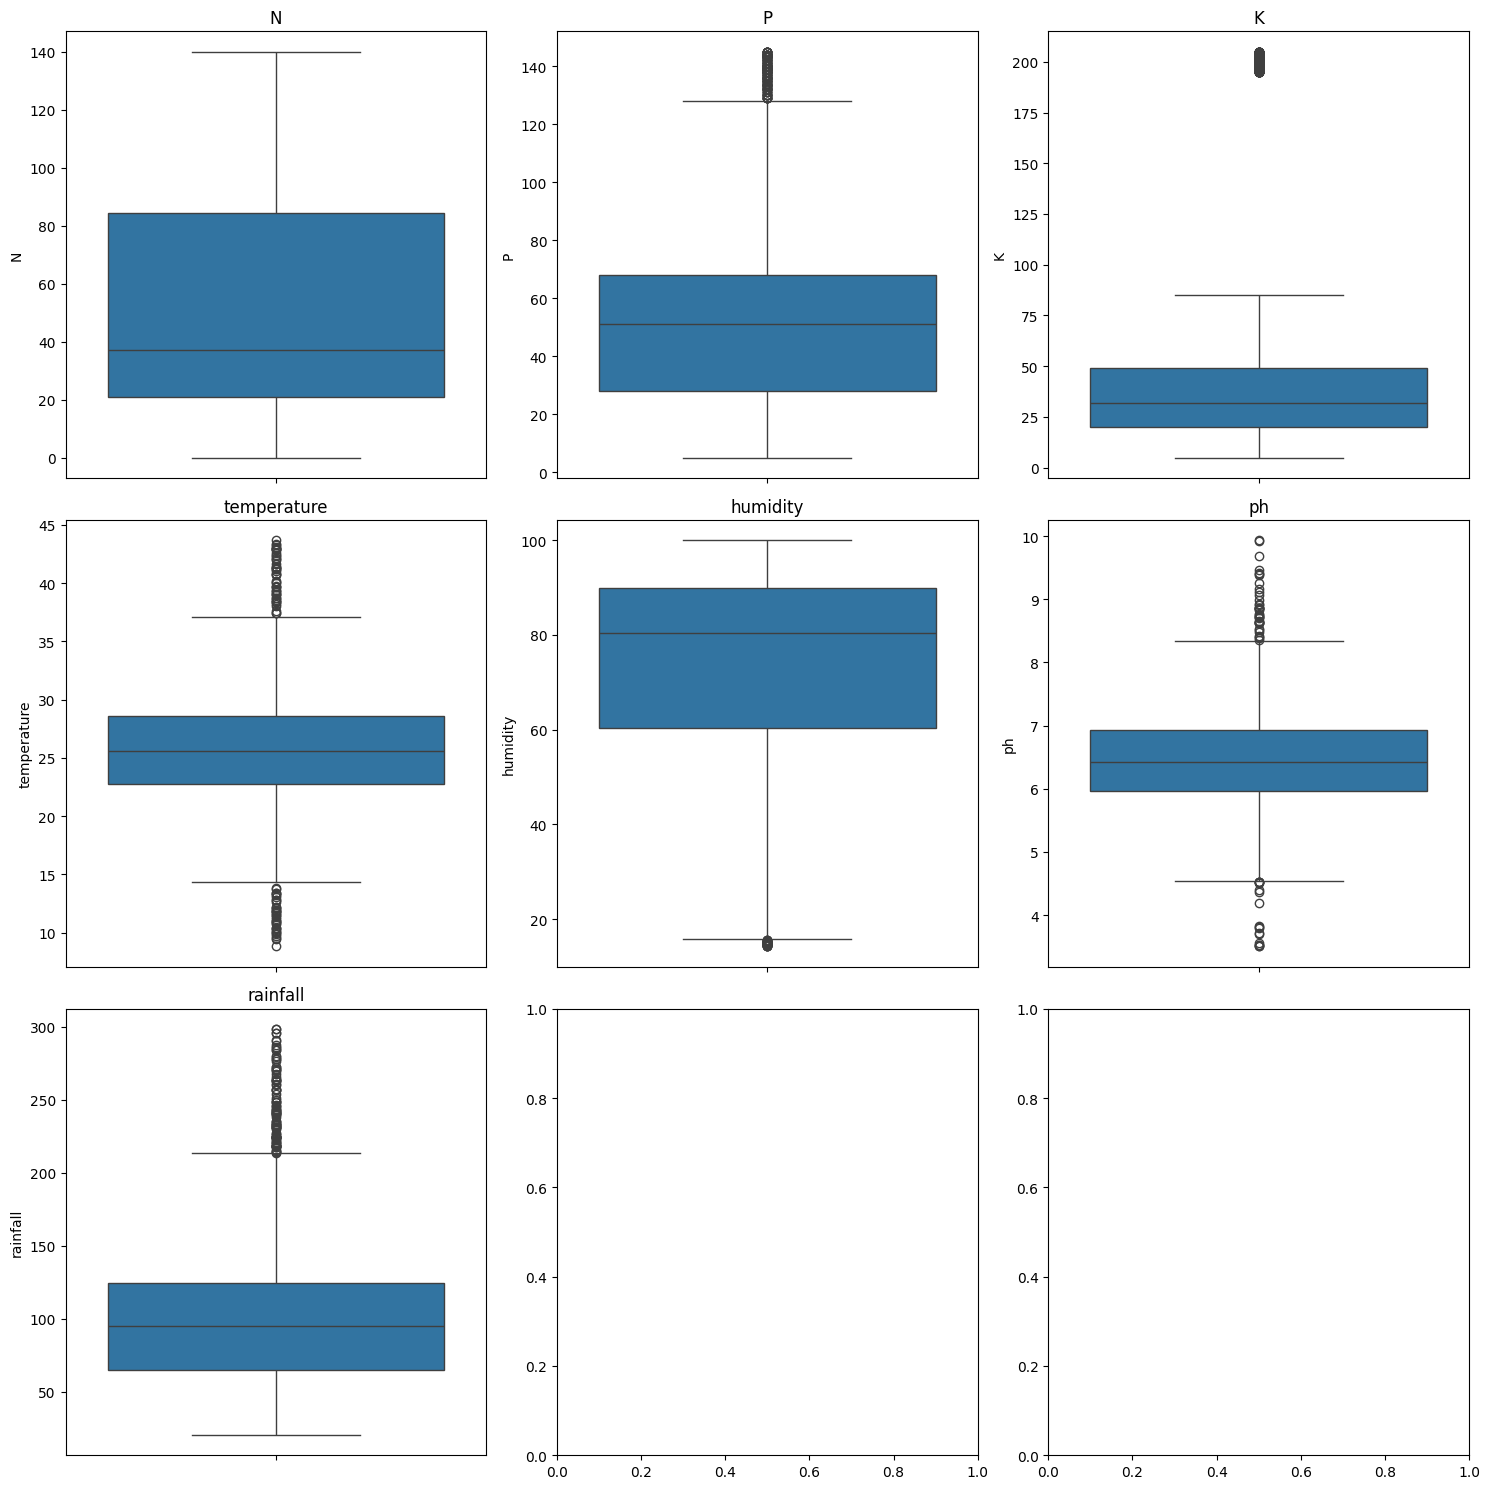

In [17]:
# Create box plot for each feature to check for outliers with orientation change
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(y=crop[i], ax=subplot)  # Changed to vertical orientation
    subplot.set_title(i)
plt.tight_layout()
plt.savefig('box_plots.png')

In [18]:
# Check the correlation of the features and round the values
numeric_columns = crop.select_dtypes(include=[np.number])
corr = numeric_columns.corr().round(2)  # Rounded correlation to 2 decimals
print("\nCorrelation Matrix (rounded):")
print(corr)


Correlation Matrix (rounded):
                N     P     K  temperature  humidity    ph  rainfall
N            1.00 -0.23 -0.14         0.03      0.19  0.10      0.06
P           -0.23  1.00  0.74        -0.13     -0.12 -0.14     -0.06
K           -0.14  0.74  1.00        -0.16      0.19 -0.17     -0.05
temperature  0.03 -0.13 -0.16         1.00      0.21 -0.02     -0.03
humidity     0.19 -0.12  0.19         0.21      1.00 -0.01      0.09
ph           0.10 -0.14 -0.17        -0.02     -0.01  1.00     -0.11
rainfall     0.06 -0.06 -0.05        -0.03      0.09 -0.11      1.00


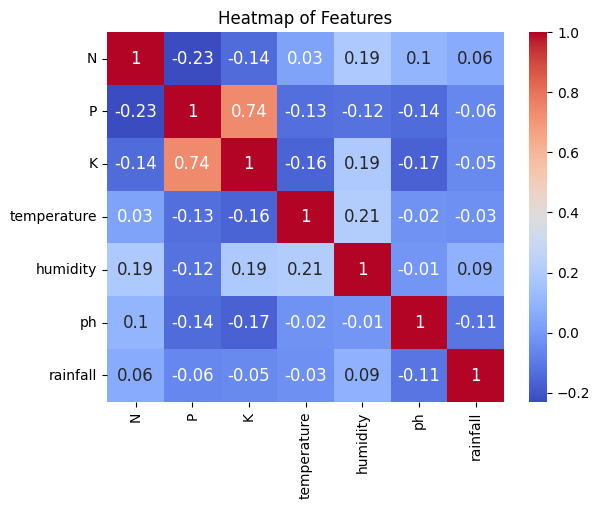

In [19]:
# Visualize the correlation matrix with larger annotations
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm', annot_kws={"size": 12})  # Increased annotation size
plt.title("Heatmap of Features")
plt.savefig('correlation_heatmap.png')

In [20]:
# Encoding
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7,
    'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13,
    'pomegranate': 14, 'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18,
    'pigeonpeas': 19, 'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}
crop['crop_no'] = crop['label'].map(crop_dict)
print("\nFirst 5 rows after encoding:")
print(crop.head())


First 5 rows after encoding:
    N   P   K  temperature   humidity        ph    rainfall label  crop_no
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        1


In [21]:
# Check the maximum value of each feature to understand the range
print("\nMaximum value of each feature:")
print(crop[features].max())  # Added to see max values


Maximum value of each feature:
N              140.000000
P              145.000000
K              205.000000
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
dtype: float64


In [22]:
# Drop the original label column
crop.drop('label', axis=1, inplace=True)
print("\nLast 5 rows after dropping label column:")
print(crop.tail())



Last 5 rows after dropping label column:
        N   P   K  temperature   humidity        ph    rainfall  crop_no
2195  107  34  32    26.774637  66.413269  6.780064  177.774507       22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610       22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839       22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293       22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041       22


In [23]:
# Train Test Split with a different random state
x = crop.drop('crop_no', axis=1)
y = crop['crop_no']
print(f"\nThe shape of x is: {x.shape}")
print(f"The shape of y is: {y.shape}")


The shape of x is: (2200, 7)
The shape of y is: (2200,)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)  # Changed random_state to 100
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)
